In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal,ndimage

# LAB 6 - 1D and 2D Convolution

## DUE: 23 February 2024 @ 11.59pm

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499

The purpose of this lab is to give you practice with 1D and 2D convolution. Note: You must show your numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook! **Please include a PDF version of your assignment to help out the TA with the grading process.**

# Q1 - Numerical 1D Convolution

This question examines how the result of convolution of a Ricker wavelet $h(t)$ with a reflectivity sequence $x(t)$ from a borehole sonic log. However, the wavelet changes as a function of characteristic frequency of the wavelet. The equation for a Ricker wavelet (2nd derivative of a Gaussian function) is given by:

$$ R(t) = \frac{2}{\pi^{1/4}\sqrt{3a}} \left(1 - \frac{t^2}{a^2}\right) e^{-t^2/2 a^2} \tag{1}$$

where $a$ is the parameter that effectively controls the width of the wavelet and thus the frequency content.  A Ricker wavelet can be specified using 

    ricker = signal.ricker(nt,a) 

where $nt$ is the number of time samples and $a$ is the frequency parameter discussed above. **Note that the output of this fuction will be centered and symmetric about 0 s.** 

I have created a random reflectivity sequence that has been: (1) scaled to a power; (2) smoothed with a 1D Gaussian function; and (3) had the overall amplitude rescaled.  Note that each time you re-run the reflectivity function below you will get a different random reflectivity function!

C:\Users\anast\AppData\Local\Temp\ipykernel_29848\2498195033.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  refl = ndimage.filters.gaussian_filter1d(np.random.randn(nt)**tpow,gsmooth)/rescale


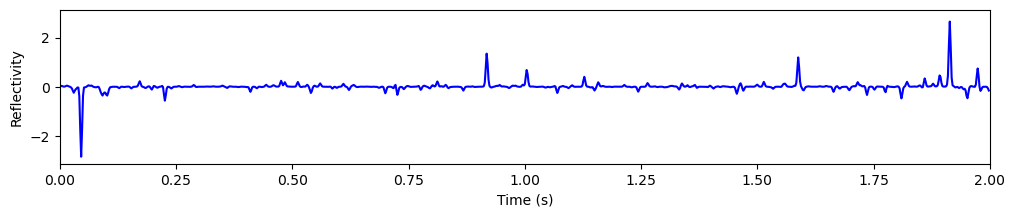

In [2]:
# . . Reflectivity parameters
nt,dt,tpow,gsmooth,rescale=1000,0.002,5,1,100
t = np.arange(0,nt,1)*dt # . . Time line

# . . Reflectivity function
refl = ndimage.filters.gaussian_filter1d(np.random.randn(nt)**tpow,gsmooth)/rescale

# . . Plot of Reflectivity
plt.figure(figsize=(12, 2))
plt.plot(t,refl,'b')
plt.xlabel('Time (s)')
plt.ylabel('Reflectivity')
plt.axis([0,2,-1.1*np.max(np.abs(refl)),1.1*np.max(np.abs(refl))])
plt.show()

## Your assignment:

(a) Find three values of $a$ in the Ricker wavelet definition of equation 1 that roughly correspond to peak frequencies of 10 Hz, 40 Hz and 70 Hz. You can determine peak frequencies by computing and examining their Fourier magnitude spectra.

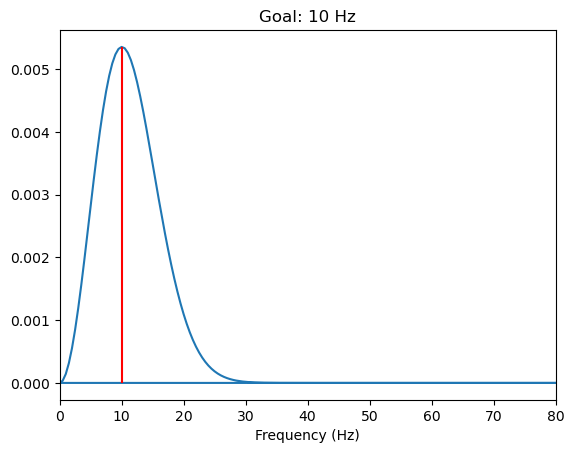

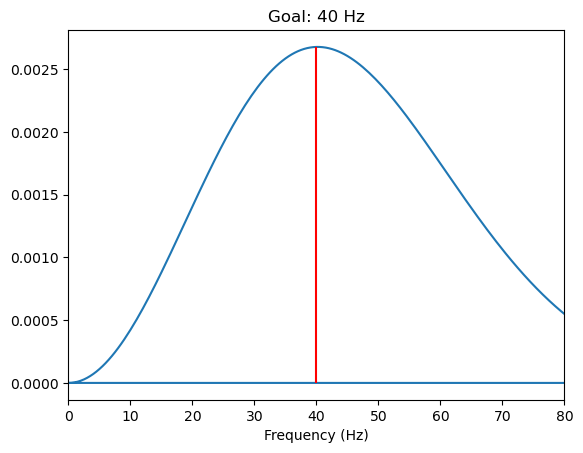

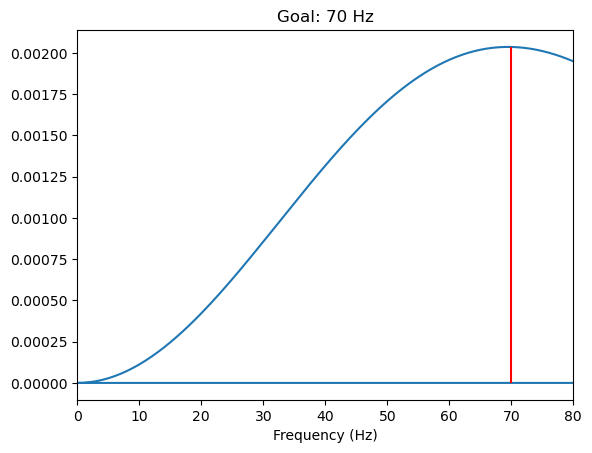

In [3]:
# . . Your answer to Question 1a goes here
#10 Hz: a=11.2
ricker1=signal.ricker(nt,11.2)
n1=len(ricker1)
fft1=np.fft.fft(ricker1)/n1
freq1=np.fft.fftfreq(n1,dt)
mag1= np.abs(fft1)
plt.xlim(0, 80)
plt.plot(freq1, mag1)
plt.vlines(x=10, ymin=min(mag1), ymax=max(mag1), color='red')
plt.title("Goal: 10 Hz")
plt.xlabel("Frequency (Hz)")
plt.show()

#40 Hz: a=2.8
ricker4=signal.ricker(nt,2.8)
n4=len(ricker4)
fft4=np.fft.fft(ricker4)/n4
freq4=np.fft.fftfreq(n4,dt)
mag4= np.abs(fft4)
plt.xlim(0, 80)
plt.plot(freq4, mag4)
plt.vlines(x=40, ymin=min(mag4), ymax=max(mag4), color='red')
plt.title("Goal: 40 Hz")
plt.xlabel("Frequency (Hz)")
plt.show()


#70 Hz: a=1.62
ricker7=signal.ricker(nt,1.62)
n7=len(ricker7)
fft7=np.fft.fft(ricker7)/n7
freq7=np.fft.fftfreq(n7,dt)
mag7= np.abs(fft7)
plt.xlim(0, 80)
plt.plot(freq7, mag7)
plt.vlines(x=70, ymin=min(mag7), ymax=max(mag7), color='red')
plt.title("Goal: 70 Hz")
plt.xlabel("Frequency (Hz)")
plt.show()




The accurate $a$ values exist then our magnitude spectra peak at a given frequency. We get the following $a$ values for our frequency values:
| Frequency (Hz) | a    |
| --------------- | ---- |
| 10              | 11.2 |
| 40              | 2.8  |
| 70              | 1.62 |



(b) For each of your three chosen values of $a$, compute and plot the convolution of the Ricker wavelet, $h(t)$, with the reflectivity function, $r(t)$ (that is, compute $y(t) = r(t)\ast h(t)$).  Also, compute and plot the spectrum of the resulting convolution, $\widehat{Y}(\omega)$.

Text(0.5, 1.0, 'Spectrum of Convolution w/ a=1.62')

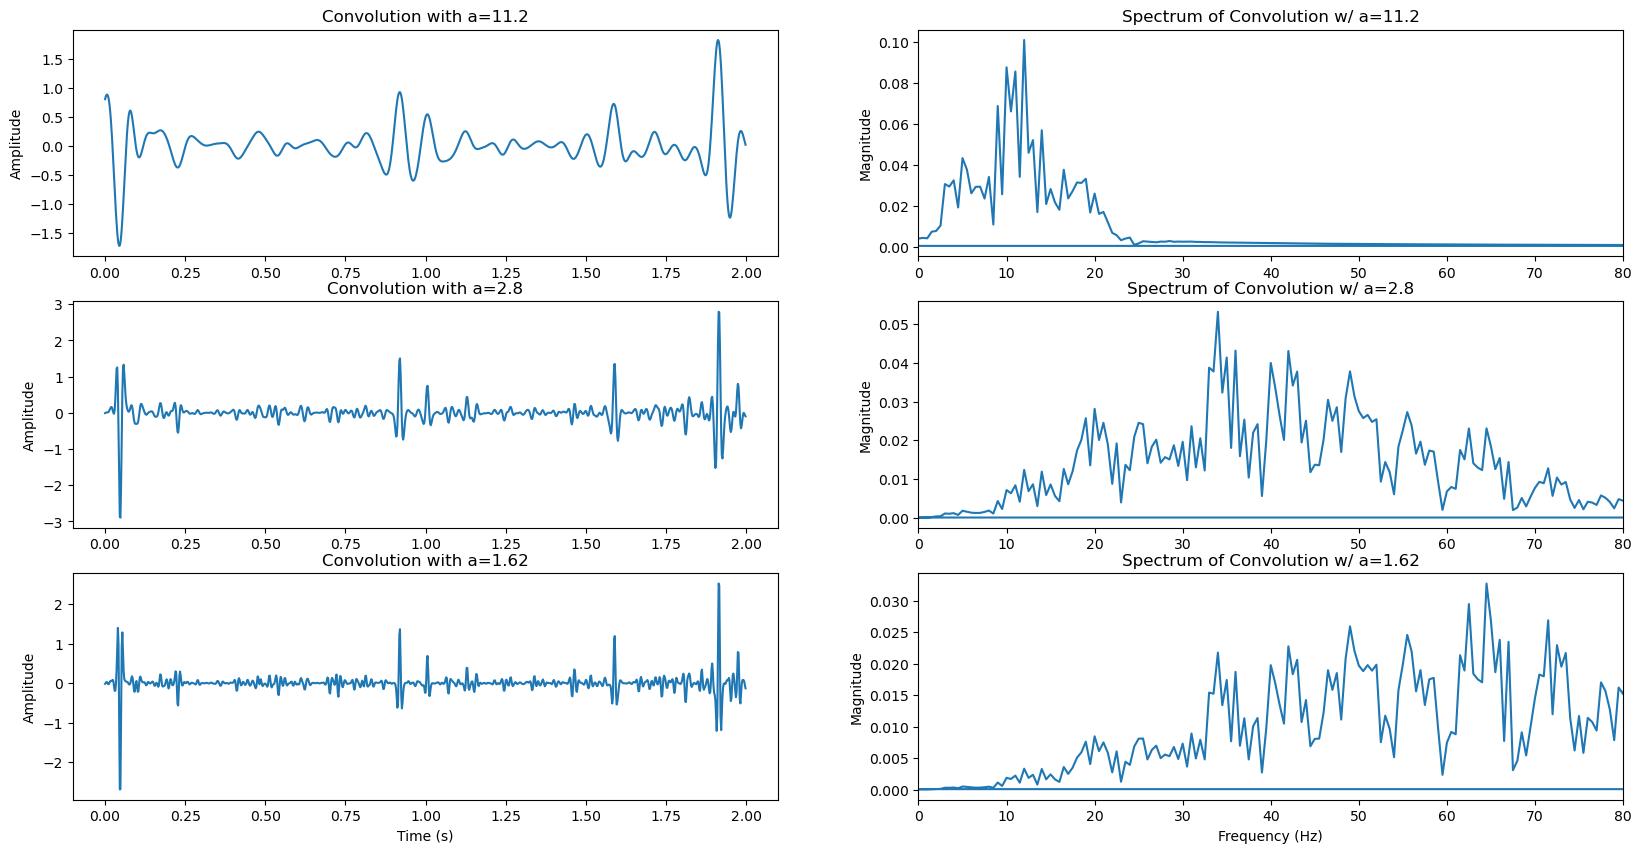

In [4]:
# . . Your answer to Question 1b goes here
freq=np.fft.fftfreq(nt,dt)
fig, axs = plt.subplots(3, 2, figsize=(20, 10))

#a=11.2
y1=np.convolve(ricker1, refl, mode='same')
axs[0,0].plot(t,y1)
axs[0,0].set_title("Convolution with a=11.2")

axs[0,0].set_ylabel("Amplitude")

ffty1=np.fft.fft(y1)/nt
magy1=np.abs(ffty1)
axs[0,1].plot(freq, magy1)
axs[0,1].set_xlim(0, 80)

axs[0,1].set_ylabel("Magnitude")
axs[0,1].set_title("Spectrum of Convolution w/ a=11.2") 


#a=2.8
y2=np.convolve(ricker4, refl, mode='same')
axs[1,0].plot(t,y2)
axs[1,0].set_title("Convolution with a=2.8")

axs[1,0].set_ylabel("Amplitude")


ffty2=np.fft.fft(y2)/nt
magy2=np.abs(ffty2)
axs[1,1].plot(freq, magy2)
axs[1,1].set_xlim(0, 80)

axs[1,1].set_ylabel("Magnitude")
axs[1,1].set_title("Spectrum of Convolution w/ a=2.8") 


#a=1.62
y3=np.convolve(ricker7, refl, mode='same')
axs[2,0].plot(t,y3)
axs[2,0].set_title("Convolution with a=1.62")
axs[2,0].set_xlabel("Time (s)")
axs[2,0].set_ylabel("Amplitude")


ffty3=np.fft.fft(y3)/nt
magy3=np.abs(ffty3)
axs[2,1].plot(freq, magy3)
axs[2,1].set_xlim(0, 80)
axs[2,1].set_xlabel("Frequency (Hz)")
axs[2,1].set_ylabel("Magnitude")
axs[2,1].set_title("Spectrum of Convolution w/ a=1.62") 


(c) How does convolution with the different wavelets affect your ability to resolve the finer-scale structure of the reflectivity function? Provide a brief explanation.

We see that as $a$ gets smaller and our characteristic frequency grows, our convolution signal becomes denser, and has more finer-scale structure. For our largest $a$ value ($10$ Hz frequency Ricker), the resulting convolution signal was able to reduce the magnitude of finer-scale structures, thus we have a smoother signal. Finally, we see that the resulting magnitude spectra for $10$ Hz has the highest spike at $ \approx 0.08$, thus it is likely the characteristic frequency of our reflcitivity signal is closer to $10$ Hz then either $40$ or $70$ Hz.


# Q2: 2D Convolution: Smoothing Magnetics Data

Last week we looked at a compilation magnetics dataset from the [USGS](https://pubs.usgs.gov/of/2000/ofr-00-0042/colorado.htm) that covers the State of Colorado.  Let's use this again to complete our 2D filtering operation.

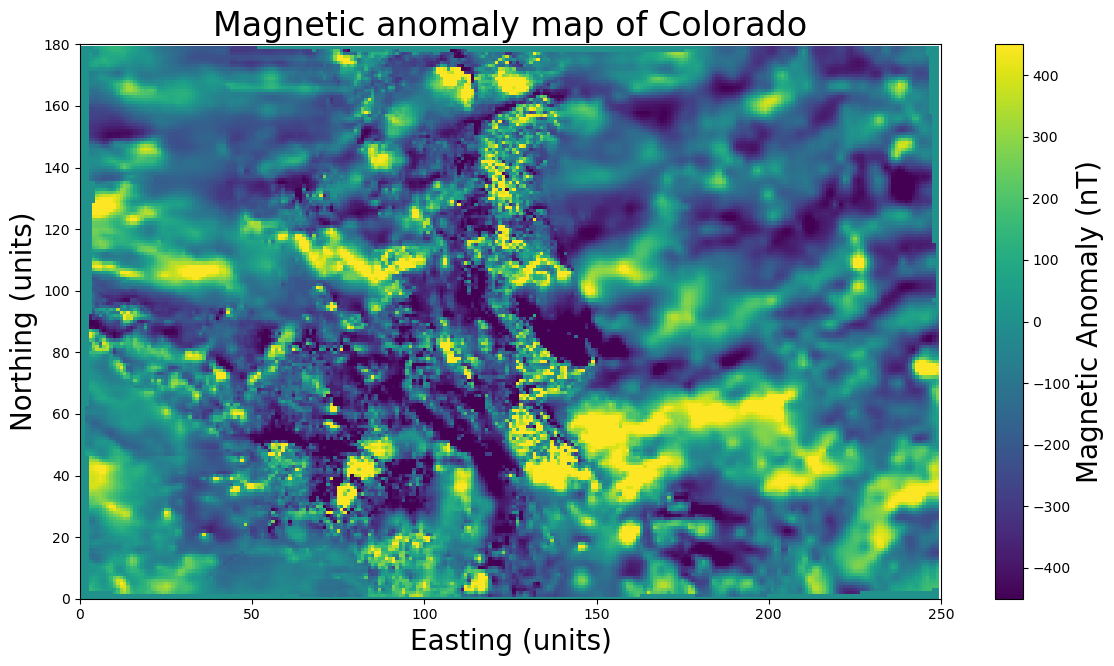

In [5]:
## . . Read in data from ASCII file line-by-line and append to array "array"
myfile = "./data/co_mag_gxf"
with open(myfile, "r") as ins:
    array = []
    for line in ins:
        array.append(line)
        
## . . Retrieve dimensions from header file
nx=int(array[3])
ny=int(array[5])

## . . Extract data and reshape it to one long array
alldata = np.zeros((5,len(array)-43));
for ii in range(43,len(array),1):
    alldata[:,ii-43]=array[ii].split();
newdata = np.reshape(alldata,(nx*ny));

## . . Find dummy values and set to 0 
for ii in range(0,nx*ny,1):
    if newdata[ii] > 1000000: 
        newdata[ii]=0.
   
## . . Reshape into full matrix
magdata = np.reshape(newdata,(ny,nx));

## . . The file repeats itself so only using a 250x180 grid
nx1,ny1=250,180

# . . Set up a small 2D meshgrid for the matplotlib pcolormesh routine
ym, xm = np.mgrid[0:ny1,0:nx1]
goodmag = magdata[0:ny1,0:nx1]

## . . Let's plot the map and look at the results!
plt.figure(figsize=(10*nx1/ny1, 10*ny1/nx1))
plt.pcolormesh(xm,ym,goodmag,cmap='viridis',vmin=-450, vmax=450)
cbar = plt.colorbar()
cbar.set_label('Magnetic Anomaly (nT)', rotation=90,fontsize=20)
plt.xlabel('Easting (units)',fontsize=20)
plt.ylabel('Northing (units)',fontsize=20)
plt.title('Magnetic anomaly map of Colorado',fontsize=24)
plt.axis([0, 250, 0, 180])
plt.show()

This question examines what happens when you convolve a short 2D filter represeting a $3\times3$ approximation of a Gaussian function with the Colorado magnetic data set.  You'll notice that some regions are very pixelated due to coarse sampling. We're interested in smoothing out these variations so that the resulting image is more "aesthetically pleasing".  The approximate 2D Gaussian filter we are going to use is defined by:

$$G_{2D} = 
\left[
\begin{array}{ccc}
\frac{1}{16} & \frac{1}{8} & \frac{1}{16}\\
\frac{1}{8 } & \frac{1}{4} & \frac{1}{8 }\\
\frac{1}{16} & \frac{1}{8} & \frac{1}{16}\\
\end{array}
\right] \tag{2}
$$

We are going to examine the effect of performing a 2D convolution of $G_{2D}$ with our *goodmag* data defined above.  To do this we can use the [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) function that is called in the following way:

   * *output = signal.convolve2d(goodmag,G2D,mode="same")*

### Your assignment:

(a) Define a $3\times3$ array using the approximate 2D Gaussian filter defined in equation 2.

In [6]:
## . . Your answer to Question 2a goes here
G2D=[[1/16, 1/8, 1/16],[1/8 ,1/4, 1/8], [1/16, 1/8, 1/16]]

(b) Use this filter to smooth the magnetic map using the *convolve2d* function.  Repeat this on your singly filtering output image a second and a third time.

In [7]:
## . . Your answer to Question 2b goes here
filt1=signal.convolve2d(goodmag,G2D,mode="same")
filt2=signal.convolve2d(filt1,G2D,mode="same")
filt3=signal.convolve2d(filt2,G2D,mode="same")

(c) Produce a figure with four subpanels (arranged $2\times2$) showing the original and the singly, doubly and trebly smoothed data.

Text(0.5, 1.0, 'Filtered Thrice')

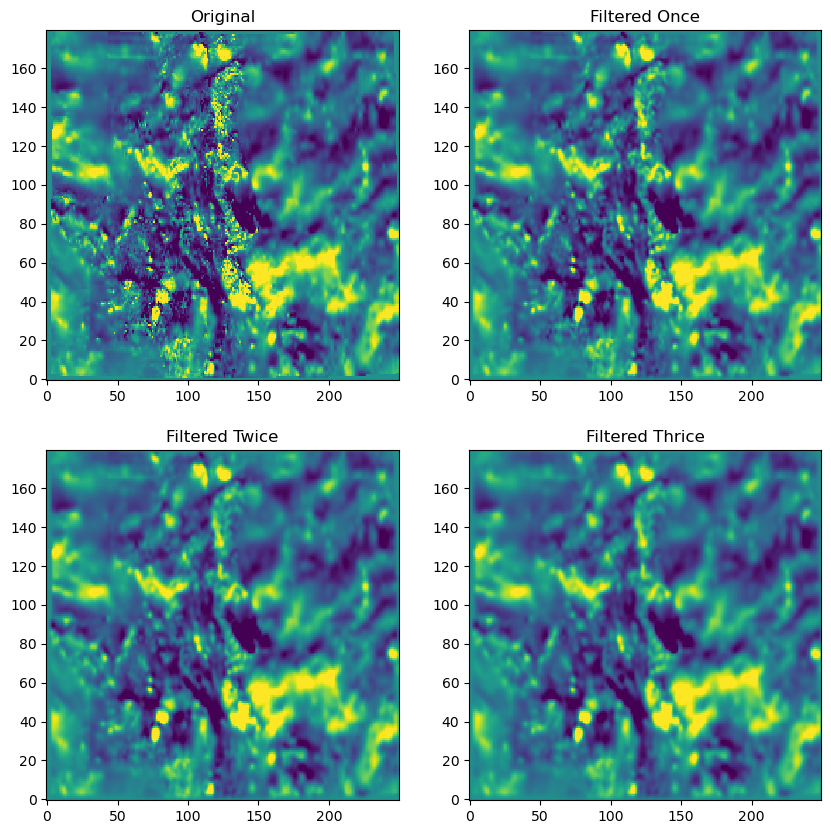

In [8]:
## . . Your answer to Question 2c goes here
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].pcolormesh(xm,ym,goodmag,cmap='viridis',vmin=-450, vmax=450)
axs[0,0].set_title('Original')

axs[0,1].pcolormesh(xm,ym,filt1,cmap='viridis',vmin=-450, vmax=450)
axs[0,1].set_title('Filtered Once')

axs[1,0].pcolormesh(xm,ym,filt2,cmap='viridis',vmin=-450, vmax=450)
axs[1,0].set_title('Filtered Twice')

axs[1,1].pcolormesh(xm,ym,filt3,cmap='viridis',vmin=-450, vmax=450)
axs[1,1].set_title('Filtered Thrice')

(d) Comment on how repeatly applying the 2D convolutional filter has affected the results.

As we filter more and more, our image becomes fuzzier but the finer-scale features (the variance or noise) of the original image start disappear. For example, if we look at the area of our original image that is slightly left-center we can see individual pixels easier, and as we filter the image this area becomes more 'blended' and we cannot see individual pixels anymore. I think what the filter is doing is difussing areas of high pixel variance so the image becomes more uniform.    